In [1]:
%run Function_Master.ipynb 
%run Parameterization.ipynb

In [10]:
#generate solutions in different file
%store -r sols 

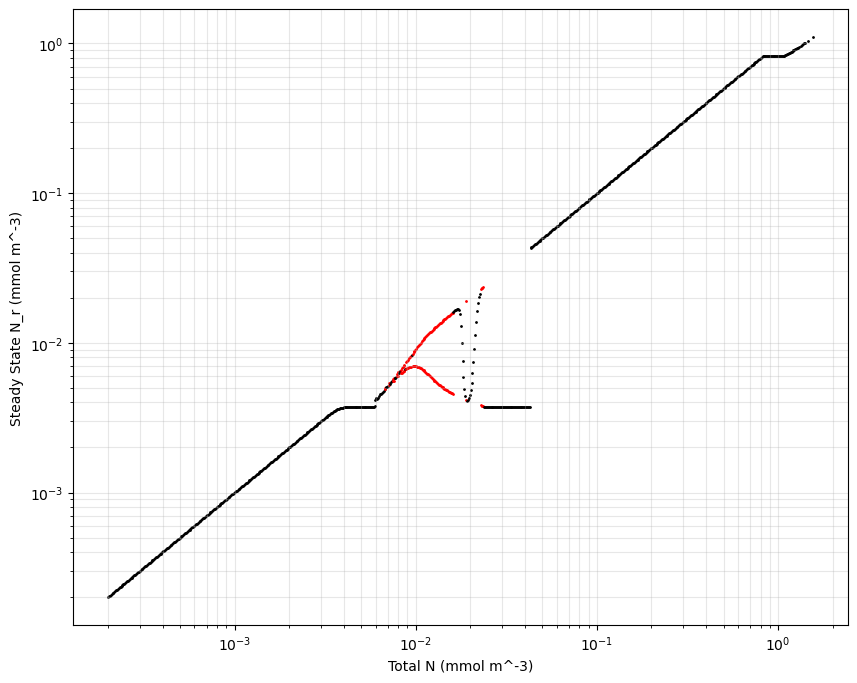

In [25]:
%%time
state_labels = ["N_n", "N_r", "P_U", "P_I", "Z ", "V_I", "V_E"]

for i in range(1, 2):
    
    plt.figure(figsize=(10,8))
    for sol in sols:

        z0, state_sol = sol[0], sol[1].y[i]
        ref = state_sol[-1]
        
        chunk = int(len(sol[1].t) * .85) # Last 15% of time span
        y_end = state_sol[chunk: ]       # look at tail end of specific state
        
        l_min = argrelmin(y_end)[-1]  # Extracting local minimum 
        l_max = argrelmax(y_end)[-1]  # and maximum
        
        # If there are oscillations....
        if len(l_min == 0) and len(l_max == 0):
            
            ref = (state_sol[chunk + l_min[-1]] + state_sol[chunk + l_max[-1]]) / 2

            if y_end[l_max[-1]] - y_end[l_min[-1]] > (.001 * ref):
                
                # plt.scatter(sum(z0), ref, color='grey', s=1, alpha=.3)
                plt.plot(sum(z0), ref, color='grey', alpha=.3)
                
                # Plot the peak and troughs
                plt.scatter(sum(z0), state_sol[chunk + l_min[-1]], color='red', s=1)
                plt.scatter(sum(z0), state_sol[chunk + l_max[-1]], color='red', s=1)
            
        else: 
            plt.scatter(sum(z0), ref, color='black', s=1)
            # plt.plot(sum(z0), ref, color='black')
            
    plt.xscale('log')
    plt.yscale('log')
    # plt.ylim(bottom=1e-12)
    plt.grid(which='both', alpha=.3)
    
    plt.ylabel(f"Steady State {state_labels[i]} (mmol m^-3)")
    plt.xlabel(f"Total N (mmol m^-3)")

plt.show()

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

state_labels = ["N_n", "N_r", "P_U", "P_I", "Z ", "V_I", "V_E"]

